# SRM M.Tech _Unsupervised Model___Assignmnet

### Dataset Information: cluster_data.csv
The experiments have been carried out with a group of 30 volunteers within an age bracket of 19-48 years. Each person performed six activities (WALKING, WALKING_UPSTAIRS, WALKING_DOWNSTAIRS, SITTING, STANDING, LAYING) wearing a smartphone (Samsung Galaxy S II) on the waist. Using its embedded accelerometer and gyroscope, they have captured 3-axial linear acceleration and 3-axial angular velocity at a constant rate of 50Hz. The experiments have been video-recorded to label the data manually.

This Dataset consist of:

--A 561-feature vector with time and frequency domain variables.

--Its activity label(Target Variable).

--An identifier of the subject who carried out the experiment

#####  a.Read the Dataset (1Mark)

##### b. Remove the Unwanter features(1 Mark)

#####  c. compute how many pair of variables having the correlation more than 0.8 ?  (1 Mark)

####  d. Perform Scaling (2 Mark)

#####  e.Apply PCA and compute the required number of principle components to capture the 90 percent variance of the original data(3 Marks) 

#####  f. Print the Eigen values and Eigen vectors of top 5 PCs(2 Marks)

##### g. Build the K-means clustering model with reduced PCA features (PCs which are explaining 90 percent variance)(2 Mark)

#####  h.compute the optimal value of clusters. Make the business inferences using the cluster groups(3 Marks)

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('human_activity.csv')
data.head(5)

,rn,activity,tBodyAcc.mean.X,tBodyAcc.mean.Y,tBodyAcc.mean.Z,tBodyAcc.std.X,tBodyAcc.std.Y,tBodyAcc.std.Z,tBodyAcc.mad.X,tBodyAcc.mad.Y,...,fBodyBodyGyroJerkMag.meanFreq,fBodyBodyGyroJerkMag.skewness,fBodyBodyGyroJerkMag.kurtosis,angle.tBodyAccMean.gravity,angle.tBodyAccJerkMean.gravityMean,angle.tBodyGyroMean.gravityMean,angle.tBodyGyroJerkMean.gravityMean,angle.X.gravityMean,angle.Y.gravityMean,angle.Z.gravityMean
0,7,STANDING,0.279,-0.0196,-0.1100,-0.997,-0.967,-0.983,-0.997,-0.966,...,0.146,-0.217,-0.5640,-0.2130,-0.2310,0.0146,-0.190,-0.852,0.182,-0.0430
1,11,STANDING,0.277,-0.0127,-0.1030,-0.995,-0.973,-0.985,-0.996,-0.974,...,0.121,0.349,0.0577,0.0807,0.5960,-0.4760,0.116,-0.852,0.188,-0.0347
2,14,STANDING,0.277,-0.0147,-0.1070,-0.999,-0.991,-0.993,-0.999,-0.991,...,0.740,-0.564,-0.7660,0.1060,-0.0903,-0.1320,0.499,-0.850,0.189,-0.0351
3,15,STANDING,0.298,0.0271,-0.0617,-0.989,-0.817,-0.902,-0.989,-0.794,...,0.131,0.208,-0.0681,0.0623,-0.0587,0.0312,-0.269,-0.731,0.283,0.0364
4,20,STANDING,0.276,-0.0170,-0.1110,-0.998,-0.991,-0.998,-0.998,-0.989,...,0.667,-0.942,-0.9660,0.2450,0.1030,0.0661,-0.412,-0.761,0.263,0.0296


In [3]:
data.shape

(3609, 563)

In [4]:
print('No of duplicates: {}'.format(sum(data.duplicated())))

No of duplicates: 0


In [5]:
data.isnull().sum()

rn                                     0
activity                               0
tBodyAcc.mean.X                        0
tBodyAcc.mean.Y                        0
tBodyAcc.mean.Z                        0
                                      ..
angle.tBodyGyroMean.gravityMean        0
angle.tBodyGyroJerkMean.gravityMean    0
angle.X.gravityMean                    0
angle.Y.gravityMean                    0
angle.Z.gravityMean                    0
Length: 563, dtype: int64

In [6]:
#We could not see any missing values

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3609 entries, 0 to 3608
Columns: 563 entries, rn to angle.Z.gravityMean
dtypes: float64(561), int64(1), object(1)
memory usage: 15.5+ MB


In [8]:
del data["rn"]
del data['activity']

In [9]:
data.head()

,tBodyAcc.mean.X,tBodyAcc.mean.Y,tBodyAcc.mean.Z,tBodyAcc.std.X,tBodyAcc.std.Y,tBodyAcc.std.Z,tBodyAcc.mad.X,tBodyAcc.mad.Y,tBodyAcc.mad.Z,tBodyAcc.max.X,...,fBodyBodyGyroJerkMag.meanFreq,fBodyBodyGyroJerkMag.skewness,fBodyBodyGyroJerkMag.kurtosis,angle.tBodyAccMean.gravity,angle.tBodyAccJerkMean.gravityMean,angle.tBodyGyroMean.gravityMean,angle.tBodyGyroJerkMean.gravityMean,angle.X.gravityMean,angle.Y.gravityMean,angle.Z.gravityMean
0,0.279,-0.0196,-0.1100,-0.997,-0.967,-0.983,-0.997,-0.966,-0.983,-0.941,...,0.146,-0.217,-0.5640,-0.2130,-0.2310,0.0146,-0.190,-0.852,0.182,-0.0430
1,0.277,-0.0127,-0.1030,-0.995,-0.973,-0.985,-0.996,-0.974,-0.985,-0.940,...,0.121,0.349,0.0577,0.0807,0.5960,-0.4760,0.116,-0.852,0.188,-0.0347
2,0.277,-0.0147,-0.1070,-0.999,-0.991,-0.993,-0.999,-0.991,-0.992,-0.943,...,0.740,-0.564,-0.7660,0.1060,-0.0903,-0.1320,0.499,-0.850,0.189,-0.0351
3,0.298,0.0271,-0.0617,-0.989,-0.817,-0.902,-0.989,-0.794,-0.888,-0.926,...,0.131,0.208,-0.0681,0.0623,-0.0587,0.0312,-0.269,-0.731,0.283,0.0364
4,0.276,-0.0170,-0.1110,-0.998,-0.991,-0.998,-0.998,-0.989,-0.997,-0.946,...,0.667,-0.942,-0.9660,0.2450,0.1030,0.0661,-0.412,-0.761,0.263,0.0296


In [10]:
data.describe()

,tBodyAcc.mean.X,tBodyAcc.mean.Y,tBodyAcc.mean.Z,tBodyAcc.std.X,tBodyAcc.std.Y,tBodyAcc.std.Z,tBodyAcc.mad.X,tBodyAcc.mad.Y,tBodyAcc.mad.Z,tBodyAcc.max.X,...,fBodyBodyGyroJerkMag.meanFreq,fBodyBodyGyroJerkMag.skewness,fBodyBodyGyroJerkMag.kurtosis,angle.tBodyAccMean.gravity,angle.tBodyAccJerkMean.gravityMean,angle.tBodyGyroMean.gravityMean,angle.tBodyGyroJerkMean.gravityMean,angle.X.gravityMean,angle.Y.gravityMean,angle.Z.gravityMean
count,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,...,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000
mean,0.274544,-0.017415,-0.109195,-0.608457,-0.506265,-0.614482,-0.634634,-0.521660,-0.616047,-0.467034,...,0.128804,-0.300815,-0.619400,0.007561,0.009484,0.029185,-0.010632,-0.496977,0.060040,-0.050202
std,0.063589,0.042589,0.056218,0.439157,0.501627,0.399514,0.413194,0.485282,0.394932,0.540188,...,0.240278,0.317963,0.308303,0.332249,0.448971,0.613615,0.490830,0.509336,0.311308,0.263935
min,-0.521000,-1.000000,-0.926000,-1.000000,-0.999000,-1.000000,-1.000000,-0.999000,-1.000000,-1.000000,...,-0.786000,-0.968000,-0.995000,-0.969000,-0.997000,-1.000000,-0.993000,-0.999000,-1.000000,-0.971000
25%,0.262000,-0.025200,-0.122000,-0.992000,-0.976000,-0.979000,-0.993000,-0.976000,-0.978000,-0.936000,...,-0.015800,-0.533000,-0.836000,-0.118000,-0.281000,-0.478000,-0.398000,-0.816000,-0.015600,-0.122000
50%,0.277000,-0.017200,-0.109000,-0.939000,-0.812000,-0.844000,-0.946000,-0.816000,-0.837000,-0.877000,...,0.132000,-0.341000,-0.706000,0.007740,0.009830,0.029600,-0.013400,-0.716000,0.183000,-0.005260
75%,0.287000,-0.011000,-0.098000,-0.254000,-0.051700,-0.283000,-0.306000,-0.084500,-0.288000,-0.018900,...,0.290000,-0.118000,-0.501000,0.142000,0.309000,0.554000,0.374000,-0.522000,0.252000,0.104000
max,0.693000,1.000000,1.000000,1.000000,0.980000,1.000000,1.000000,0.988000,1.000000,1.000000,...,0.871000,0.990000,0.957000,0.981000,0.997000,0.999000,0.996000,0.977000,1.000000,0.998000


In [11]:
corr = data.corr()
m = ~(corr.mask(np.eye(len(corr), dtype=bool)).abs() > 0.8).any()
orig = corr.loc[m, m]
orig

,tBodyAcc.mean.X,tBodyAcc.mean.Y,tBodyAcc.mean.Z,tBodyAcc.arCoeff.X.4,tBodyAcc.arCoeff.Y.4,tBodyAcc.arCoeff.Z.3,tBodyAcc.arCoeff.Z.4,tBodyAcc.correlation.X.Y,tBodyAcc.correlation.X.Z,tBodyAcc.correlation.Y.Z,...,fBodyBodyAccJerkMag.maxInds,fBodyBodyAccJerkMag.meanFreq,fBodyBodyGyroMag.min,fBodyBodyGyroMag.maxInds,fBodyBodyGyroJerkMag.maxInds,fBodyBodyGyroJerkMag.meanFreq,angle.tBodyAccMean.gravity,angle.tBodyAccJerkMean.gravityMean,angle.tBodyGyroMean.gravityMean,angle.tBodyGyroJerkMean.gravityMean
tBodyAcc.mean.X,1.000000,0.216780,-0.302976,0.049893,0.038613,-0.023348,-0.003240,0.035906,0.089248,-0.011444,...,0.021868,0.042157,0.006984,0.044335,0.015450,0.024893,-0.567714,0.017247,0.038627,0.035722
tBodyAcc.mean.Y,0.216780,1.000000,-0.104570,-0.041671,-0.007402,-0.004233,-0.002991,0.013230,-0.002365,0.028010,...,-0.000493,-0.012748,-0.035859,-0.010827,0.007031,-0.023401,0.069540,-0.038813,0.005894,0.063621
tBodyAcc.mean.Z,-0.302976,-0.104570,1.000000,-0.027409,0.015057,-0.005777,0.013674,0.039156,-0.045317,0.009859,...,-0.017232,-0.038136,-0.007367,-0.008734,-0.035071,-0.020979,0.051885,-0.051859,-0.059418,-0.023572
tBodyAcc.arCoeff.X.4,0.049893,-0.041671,-0.027409,1.000000,0.144089,-0.137257,0.204928,-0.176784,0.091347,0.004462,...,0.035030,-0.118887,0.143009,0.078376,0.063798,-0.028805,-0.044377,-0.012398,0.029507,-0.015421
tBodyAcc.arCoeff.Y.4,0.038613,-0.007402,0.015057,0.144089,1.000000,-0.083367,0.232878,-0.087359,-0.004575,-0.075280,...,0.012576,-0.028998,-0.012271,0.022815,0.013116,-0.011605,-0.044641,-0.001902,-0.005793,-0.016271
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fBodyBodyGyroJerkMag.meanFreq,0.024893,-0.023401,-0.020979,-0.028805,-0.011605,0.080678,-0.050155,0.018356,0.066161,-0.035981,...,0.234140,0.504405,-0.100025,0.092932,0.301528,1.000000,-0.026042,-0.007314,-0.047721,-0.008656
angle.tBodyAccMean.gravity,-0.567714,0.069540,0.051885,-0.044377,-0.044641,0.040236,-0.009725,0.012473,-0.000351,-0.008146,...,0.001250,-0.012287,-0.010271,-0.032447,0.000521,-0.026042,1.000000,-0.111583,-0.035379,-0.024574
angle.tBodyAccJerkMean.gravityMean,0.017247,-0.038813,-0.051859,-0.012398,-0.001902,-0.007012,0.011989,-0.005966,-0.027246,0.012243,...,-0.005412,-0.000787,0.008013,-0.008556,-0.013918,-0.007314,-0.111583,1.000000,0.016817,0.025604
angle.tBodyGyroMean.gravityMean,0.038627,0.005894,-0.059418,0.029507,-0.005793,-0.006194,-0.000657,-0.046310,-0.031669,0.011265,...,-0.017280,-0.056798,0.058873,-0.034763,-0.004998,-0.047721,-0.035379,0.016817,1.000000,-0.119781


In [12]:
#Scalling 
from sklearn.preprocessing import StandardScaler

ac=StandardScaler()
df_ac=ac.fit_transform(data)
df_ac=pd.DataFrame(df_ac,columns=data.columns)
df_ac.head(2)

,tBodyAcc.mean.X,tBodyAcc.mean.Y,tBodyAcc.mean.Z,tBodyAcc.std.X,tBodyAcc.std.Y,tBodyAcc.std.Z,tBodyAcc.mad.X,tBodyAcc.mad.Y,tBodyAcc.mad.Z,tBodyAcc.max.X,...,fBodyBodyGyroJerkMag.meanFreq,fBodyBodyGyroJerkMag.skewness,fBodyBodyGyroJerkMag.kurtosis,angle.tBodyAccMean.gravity,angle.tBodyAccJerkMean.gravityMean,angle.tBodyGyroMean.gravityMean,angle.tBodyGyroJerkMean.gravityMean,angle.X.gravityMean,angle.Y.gravityMean,angle.Z.gravityMean
0,0.070090,-0.051303,-0.014321,-0.884871,-0.918609,-0.922544,-0.877109,-0.915758,-0.929283,-0.877531,...,0.071576,0.263638,0.179717,-0.663934,-0.535708,-0.023772,-0.365489,-0.697128,0.391822,0.027291
1,0.038634,0.110734,0.110213,-0.880316,-0.930571,-0.927550,-0.874688,-0.932246,-0.934348,-0.875680,...,-0.032484,2.043967,2.196519,0.220164,1.306538,-0.823407,0.258032,-0.697128,0.411099,0.058742


In [13]:
#PCA
from sklearn.decomposition import PCA
pca = PCA(0.9)
pca.fit(df_ac)

PCA(n_components=0.9)

In [14]:
PCA(copy=True, iterated_power='auto', n_components=0.9, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

PCA(n_components=0.9)

In [15]:
pca.n_components_

64

In [16]:
pca_df = pca.transform(df_ac)
pca_df.shape

(3609, 64)

In [17]:
#EigenValue and EigenVector
import numpy as np
from numpy.linalg import eig
z = np.array(pca_df[0:5,0:5])
x,y=eig(z)
print('E-value:', x)
print('E-vector', y)

E-value: [-5.20558338+2.06193107j -5.20558338-2.06193107j -0.6071606 +2.9446845j
 -0.6071606 -2.9446845j   0.38848996+0.j        ]
E-vector [[-0.37540237+0.12891138j -0.37540237-0.12891138j  0.22868159+0.02128124j
   0.22868159-0.02128124j -0.11086012+0.j        ]
 [-0.42396017+0.15183753j -0.42396017-0.15183753j  0.00833167-0.00278158j
   0.00833167+0.00278158j -0.10616587+0.j        ]
 [-0.19771109+0.17201331j -0.19771109-0.17201331j -0.09523242+0.12917806j
  -0.09523242-0.12917806j -0.44950923+0.j        ]
 [-0.68089712+0.j         -0.68089712-0.j          0.86475517+0.j
   0.86475517-0.j         -0.87316674+0.j        ]
 [-0.3142122 +0.09289566j -0.3142122 -0.09289566j  0.19066128+0.37049329j
   0.19066128-0.37049329j  0.10936243+0.j        ]]


In [20]:
#K-Means Clustering
from sklearn.cluster import KMeans
err=[] 
for i in range(1,10):
  KN=KMeans(n_clusters=i)
  KN.fit(pca_df)
  err.append(KN.inertia_)
err

[1825614.6046238507,
 957465.5128645075,
 828141.0595855284,
 776343.1642452384,
 725979.9897462858,
 697496.1589688516,
 676517.3195353504,
 658418.3278525444,
 643116.0192743749]

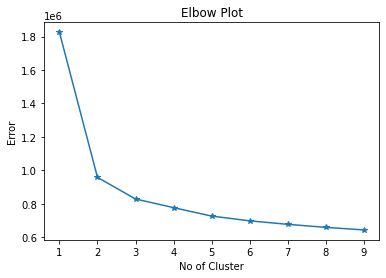

In [21]:
plt.plot(range(1,10),err,marker='*')
plt.xlabel('No of Cluster')
plt.ylabel('Error')
plt.title('Elbow Plot')
plt.show()

In [22]:
KN=KMeans(n_clusters=3,random_state=100)
KN.fit(pca_df)

KMeans(n_clusters=3, random_state=100)

In [23]:
df_k = data.copy()
df_k['label']=KN.labels_
df_k.head()

,tBodyAcc.mean.X,tBodyAcc.mean.Y,tBodyAcc.mean.Z,tBodyAcc.std.X,tBodyAcc.std.Y,tBodyAcc.std.Z,tBodyAcc.mad.X,tBodyAcc.mad.Y,tBodyAcc.mad.Z,tBodyAcc.max.X,...,fBodyBodyGyroJerkMag.skewness,fBodyBodyGyroJerkMag.kurtosis,angle.tBodyAccMean.gravity,angle.tBodyAccJerkMean.gravityMean,angle.tBodyGyroMean.gravityMean,angle.tBodyGyroJerkMean.gravityMean,angle.X.gravityMean,angle.Y.gravityMean,angle.Z.gravityMean,label
0,0.279,-0.0196,-0.1100,-0.997,-0.967,-0.983,-0.997,-0.966,-0.983,-0.941,...,-0.217,-0.5640,-0.2130,-0.2310,0.0146,-0.190,-0.852,0.182,-0.0430,0
1,0.277,-0.0127,-0.1030,-0.995,-0.973,-0.985,-0.996,-0.974,-0.985,-0.940,...,0.349,0.0577,0.0807,0.5960,-0.4760,0.116,-0.852,0.188,-0.0347,0
2,0.277,-0.0147,-0.1070,-0.999,-0.991,-0.993,-0.999,-0.991,-0.992,-0.943,...,-0.564,-0.7660,0.1060,-0.0903,-0.1320,0.499,-0.850,0.189,-0.0351,0
3,0.298,0.0271,-0.0617,-0.989,-0.817,-0.902,-0.989,-0.794,-0.888,-0.926,...,0.208,-0.0681,0.0623,-0.0587,0.0312,-0.269,-0.731,0.283,0.0364,0
4,0.276,-0.0170,-0.1110,-0.998,-0.991,-0.998,-0.998,-0.989,-0.997,-0.946,...,-0.942,-0.9660,0.2450,0.1030,0.0661,-0.412,-0.761,0.263,0.0296,0


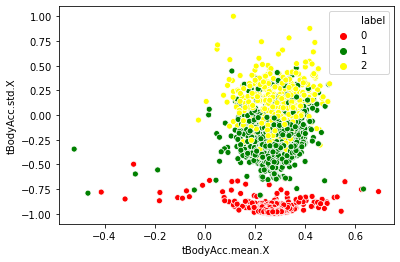

In [25]:
#Finding Optimal clusters
import seaborn as sb
sb.scatterplot(x='tBodyAcc.mean.X',y='tBodyAcc.std.X', hue='label', data =df_k,palette=['red','green','yellow'])
plt.show()

In [26]:

#K Means algorithm indicated that 3 is the ideal number of clusters.

#The clusters could denote the 3 distinct activities like Walking, Standing and Sitting